# Simple RNN

In [27]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def get_sequence(length):
    freq = 10
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

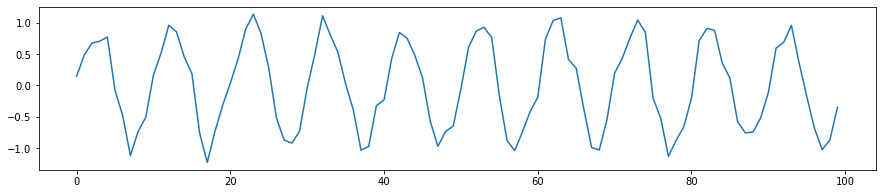

In [29]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [30]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence = get_sequence(length + output)
        
        X.append(sequence[:-output])
        y.append(sequence[-output:])
        
    X = np.array(X).reshape(n_samples, length,1)
    y = np.array(y).reshape(n_samples, output)
    
    return X, y

In [31]:
X,y = generate_examples(length=100, n_samples=50, output=5)

In [32]:
X.shape, y.shape

((50, 100, 1), (50, 5))

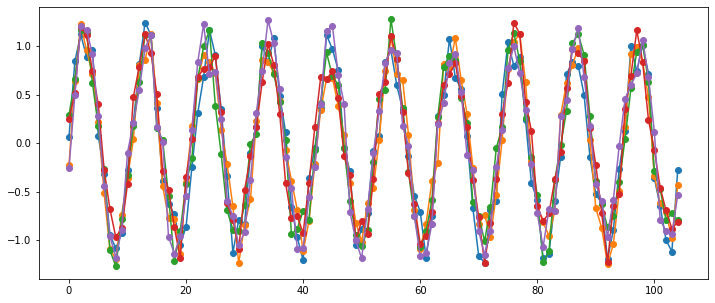

In [33]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

In [34]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [35]:
# configure problem
sequence_length = 1000
hidden_units = 100
output_length = 250

In [36]:
# define model
model = Sequential(name="simpleRNN")

model.add(SimpleRNN(units=100,\
                    input_shape=(sequence_length,1),\
                    activation="relu",\
                    name = "first-RNN-layer"))

model.add(Dense(output_length,\
                name = "dense-layer"))


model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')

print(model.summary())

Model: "simpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first-RNN-layer (SimpleRNN)  (None, 100)              10200     
                                                                 
 dense-layer (Dense)         (None, 250)               25250     
                                                                 
Total params: 35,450
Trainable params: 35,450
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
#First Layer
n = 1 #input vetor x
m = 100 # unit in RNN
g = 1 # no of neuron layers inside RNN
#(num_features + num_units)* num_units + num_units
parameters = g*(n+m)*m+m
print(parameters)

10200


In [38]:
#Dense Layer
n = 100 #input vetor x
m = 250 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

25250


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [39]:
sequence_length = 1000
samples = 1000
output_length = 250

In [40]:
X, y = generate_examples(sequence_length, samples, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [41]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 19s 178ms/step - loss: 99272825503744.0000 - accuracy: 0.0000e+00 - val_loss: 0.4209 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 18s 175ms/step - loss: 0.3967 - accuracy: 0.0000e+00 - val_loss: 0.3587 - val_accuracy: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 17s 175ms/step - loss: 0.2963 - accuracy: 0.0000e+00 - val_loss: 0.1856 - val_accuracy: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 17s 174ms/step - loss: 0.0833 - accuracy: 0.0320 - val_loss: 0.0385 - val_accuracy: 0.0600
Epoch 5/5
100/100 [==============================] - 17s 175ms/step - loss: 0.0382 - accuracy: 0.0470 - val_loss: 0.0375 - val_accuracy: 0.0550


In [42]:
print(history.history)

{'loss': [99272825503744.0, 0.3967040777206421, 0.2963145673274994, 0.08328747749328613, 0.038174305111169815], 'accuracy': [0.0, 0.0, 0.0, 0.03200000151991844, 0.04699999839067459], 'val_loss': [0.42090487480163574, 0.3587051331996918, 0.1855783462524414, 0.03853803500533104, 0.03750185668468475], 'val_accuracy': [0.0, 0.0, 0.0, 0.05999999865889549, 0.054999999701976776]}


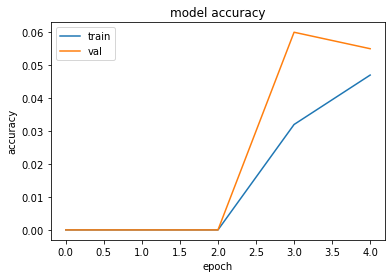

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

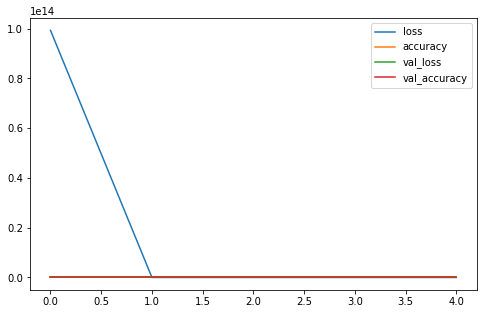

In [44]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [45]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0) 
print(loss)

[0.03778952732682228, 0.029999999329447746]


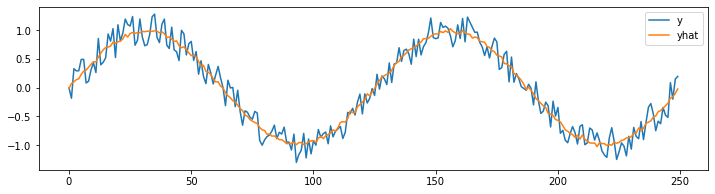

In [51]:
# prediction on new data
X, y = generate_examples(sequence_length, 20, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0], label='yhat') 
plt.legend()
plt.show()


### Explore Weights

In [52]:
for array in model.layers[0].get_weights():
    print (array.shape)

(1, 100)
(100, 100)
(100,)


In [53]:
for array in model.layers[1].get_weights():
    print (array.shape)

(100, 250)
(250,)
